In [128]:
# Library imports
import numpy as np
import pandas as pd

# Primary Dataset

In [129]:
# Read the dataset
df = pd.read_csv('data/primary_dataset.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Pre-processing

In [130]:
# Standardize column names
df.columns = ['rank', 'title', 'genres', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue', 'metascore']

# lowercase movie titles (will be easier to merge datasets later on)
df.title = df.title.map(str.lower)

# lowercase genres
df.genres = df.genres.map(str.lower)

df.head()

,rank,title,genres,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,guardians of the galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,split,"horror,thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,sing,"animation,comedy,family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,suicide squad,"action,adventure,fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## General statistics

In [131]:
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Ratings and Revenue

<AxesSubplot:xlabel='rating'>

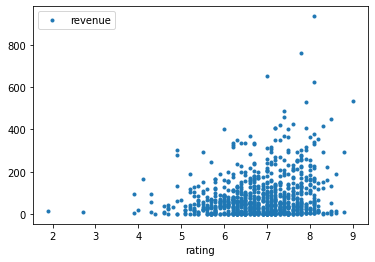

In [132]:
df.plot(x="rating", y="revenue", style=".")

From this plot, we can see individual facts about the distribution of the two attributes:

1. The ratings in this dataset are **rarely below 5**
2. The average revenue for a movie is **around 100 millions USD**, and those movies will tend to have a **rating between 6 and 8**.

Rating and revenue do not seem to be particularly correlated however.

## Average revenue of the top 100 movies and the next top 100 movies

In [133]:
print("Average revenue of the top 100 movies:", df.head(100).revenue.mean())
print("Average revenue of the top 100-200 movies:", df.head(200).tail(100).revenue.mean())

Average revenue of the top 100 movies: 157.49604395604396
Average revenue of the top 100-200 movies: 105.19988636363637


## Top 5 directors in the top 100

In [134]:
df.head(100).director.value_counts()[:5]

Christopher Nolan    4
Martin Scorsese      3
Joss Whedon          2
Denis Villeneuve     2
Quentin Tarantino    2
Name: director, dtype: int64

## Top 3 directors in the 10 most grossing movies

In [135]:
df.sort_values(by="revenue", ascending=False).head(10).director.value_counts()[:3]

Joss Whedon          2
Christopher Nolan    2
Colin Trevorrow      1
Name: director, dtype: int64

## Top 10 of popular actors

In [136]:
df.actors.str.split(',\s+', expand=True).stack().value_counts()[:10]

Mark Wahlberg         15
Brad Pitt             13
Christian Bale        13
Hugh Jackman          13
Tom Hardy             12
Michael Fassbender    12
Channing Tatum        11
Robert Downey Jr.     11
Johnny Depp           11
Jake Gyllenhaal       11
dtype: int64

# Secondary Dataset

In [137]:
# Read the dataset
df2 = pd.read_csv('data/secondary_dataset.csv')

# We have the "\xa0" character at the end ofthe titles: we want to get rid of it
df2.movie_title = df2.movie_title.replace(u'\xa0', u'', regex=True)

# lowercase movie titles (will be easier to merge datasets later on)
df2.movie_title = df2.movie_title.map(str.lower)

df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Merged datasets

In [138]:
# We want to get the movie budget as well as the number of facebook likes
df3 = df.merge(df2[['movie_title', 'budget', 'movie_facebook_likes']], left_on="title", right_on="movie_title")

df3.head()

,rank,title,genres,description,director,actors,year,runtime,rating,votes,revenue,metascore,movie_title,budget,movie_facebook_likes
0,1,guardians of the galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,guardians of the galaxy,170000000.0,96000
1,2,prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,prometheus,130000000.0,97000
2,5,suicide squad,"action,adventure,fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,suicide squad,175000000.0,80000
3,16,the secret life of pets,"animation,adventure,comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87,6.6,120259,368.31,61.0,the secret life of pets,75000000.0,36000
4,18,jason bourne,"action,thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,58.0,jason bourne,120000000.0,31000


__Note:__ We have gone to **~681 entries** compared to **1'000** in the first dataset.